# <center> Predictive Model to Determine the Proportion of International Students using the World University Rankings 2023

# Introduction

## Data

The selected dataset, titled "[World University Rankings 2023](https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023)", was uploaded to Kaggle by Syed Ali Taqi. As the title suggests, this dataset includes the data that Times Higher Education provided in their world rankings for universities in 2023. According to the description of the dataset on Kaggle, there are 1799 universities, which implies that there are 1799 observations.

This dataset includes 13 variables:
- *University Rank* (numeric/double class)
- *Name of University* (character)
- *Location* (character)
- *Number of Students* (numeric/double class)
- *Number of Students per Staff* (numeric/double class)
- *International Student* (numeric/double class, stored as a proportion)
- *Female-to-Male Ratio* (numeric/double class, per 100 students)
- *Overall Score* (numeric/double class, out of 100)
- *Teaching Score* (numeric/double class, out of 100)
- *Research Score* (numeric/double class, out of 100)
- *Citations Score* (numeric/double class, out of 100)
- *Industry Income Score* (numeric/double class, out of 100)
- *International Outlook Score* (numeric/double class, out of 100)

***Note:** All of the above variables are stored as character classes in the dataset, but will be converted to more appropriate data classes.*

The first seven variables are self-explanatory, while the latter six variables are scores issued by Times Higher Education according to their criteria which is not readily available within the dataset.

## Question

“Can we use the variables chosen to rank the universities to create an accurate model to *predict* the proportion of international students at universities?”

Existing studies suggest a correlation between certain input variables and the proportion of international students in universities. A paper by Seungcheol Austin Lee, published in 2009, suggests that a good female-to-male ratio might attract more female international students to universities, thereby boosting the overall proportion of international students at the university (Lee, 2009). Quality of education plays a huge role when choosing universities. This would suggest that the teaching score variable will be essential in our prediction (Rahman et al., 2021). Lastly, the international outlook score of a university positively reflects its reputation (Acar, 2022). All of these factors could correlate with the proportion of international students, as they present compelling reasons for overseas students to select the universities. 

`inter_prop` is the response variable of interest.

# Methods and Results

## a) Exploratory Data Analysis (EDA)

In [1]:
#loading in required R packages
library(repr)
library(tidyverse)
library(dplyr)
library(infer)
library(broom)
library(cowplot)
library(GGally)
library(leaps)
library(mltools)
library(car) ###remove if you're not using vif()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    so

In [2]:
#assigning url for dataset to object in R
url <- "https://raw.githubusercontent.com/LyleForza/S301-WUR-2023-project/main/World%20University%20Rankings%202023.csv"

#reading dataset from web via url and tidying
wur1 <- read.csv(url, header=TRUE, sep=",", dec =",") %>%
       na.omit(wur) %>% 
       tibble()

#renaming variable names for convenience
wur1 <- rename(wur1,
               rank = University.Rank,
               name = Name.of.University,
               loc = Location,
               no_stud = No.of.student,
               no_stud_per_staff = No.of.student.per.staff,
               inter_prop = International.Student,
               female_prop = Female.Male.Ratio,
               overall = OverAll.Score,
               teaching = Teaching.Score,
               research = Research.Score,
               citations = Citations.Score,
               industry_income = Industry.Income.Score,
               inter_outlook = International.Outlook.Score)
head(wur1)

#converting all relevant variables into <dbl> (numerical) instead of <chr> (character)
wur <- wur1 %>%
mutate(rank = as.numeric(wur1$rank),
      no_stud = no_stud*1000,
      no_stud_per_staff = as.numeric(wur1$no_stud_per_staff),
      inter_prop = substr(wur1$inter_prop, 1, nchar(wur1$inter_prop)-1),
      inter_prop = as.numeric(inter_prop)/100,
      female_prop = substr(wur1$female_prop, 1, nchar(wur1$female_prop)-5), 
      #converting the female-to-male ratio to a proportion for convenience of understanding
      female_prop = as.numeric(female_prop)/100,
      overall = as.numeric(wur1$overall),
      teaching = as.numeric(wur1$teaching),
      research = as.numeric(wur1$research),
      citations = as.numeric(wur1$citations),
      industry_income = as.numeric(wur1$industry_income),
      inter_outlook = as.numeric(wur1$inter_outlook))
head(wur)

rank,name,loc,no_stud,no_stud_per_staff,inter_prop,female_prop,overall,teaching,research,citations,industry_income,inter_outlook
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,University of Oxford,United Kingdom,20.965,10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21.887,9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20.185,11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16.164,7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11.415,8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2.237,6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


Warning message:
“There were 7 warnings in `mutate()`.
The first warning was:
ℹ In argument: `rank = as.numeric(wur1$rank)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 6 remaining warnings.”


rank,name,loc,no_stud,no_stud_per_staff,inter_prop,female_prop,overall,teaching,research,citations,industry_income,inter_outlook
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,University of Oxford,United Kingdom,20965,10.6,0.42,0.48,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,0.25,0.50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,0.39,0.47,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,0.24,0.46,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,0.33,0.40,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,0.34,0.37,94.1,90.9,97.0,97.3,89.8,83.6


Since the values for `rank` are no longer discrete numbers after the 200th ranked school, instead becoming ranges (e.g. "201-250" is a value), we will instead use a subset containing only the top 200 ranked universities. Furthermore, a noticeably large portion of the dataset have NA values, but this does not seem to be the case for most of the top 200 schools. Incidentally, 200 universities is a sufficiently large sample size to use this data to observe if there are any trends in the data between variables.

In [3]:
#filtering for the top 200 ranked universities
wur <- wur %>%
       filter(rank <= 200) %>%
       filter(!is.na(female_prop))
nrow(wur)

[1] 173

To visualize the relationship between the input variables and the response variable `inter_prop`, we will make a correlation matrix plot. We can also note the relationships between the input variables themselves, thereby allowing us to check for multicollinearity or any other issues that may arise.

In [4]:
#removing non-numerical variables
wurnum <- wur %>%
          select(-name, -loc)

In [5]:
#finding correlation between all variables
corr_matrix_wur <- wurnum %>%
   cor() %>%
   as.data.frame() %>%
   rownames_to_column("var1") %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")

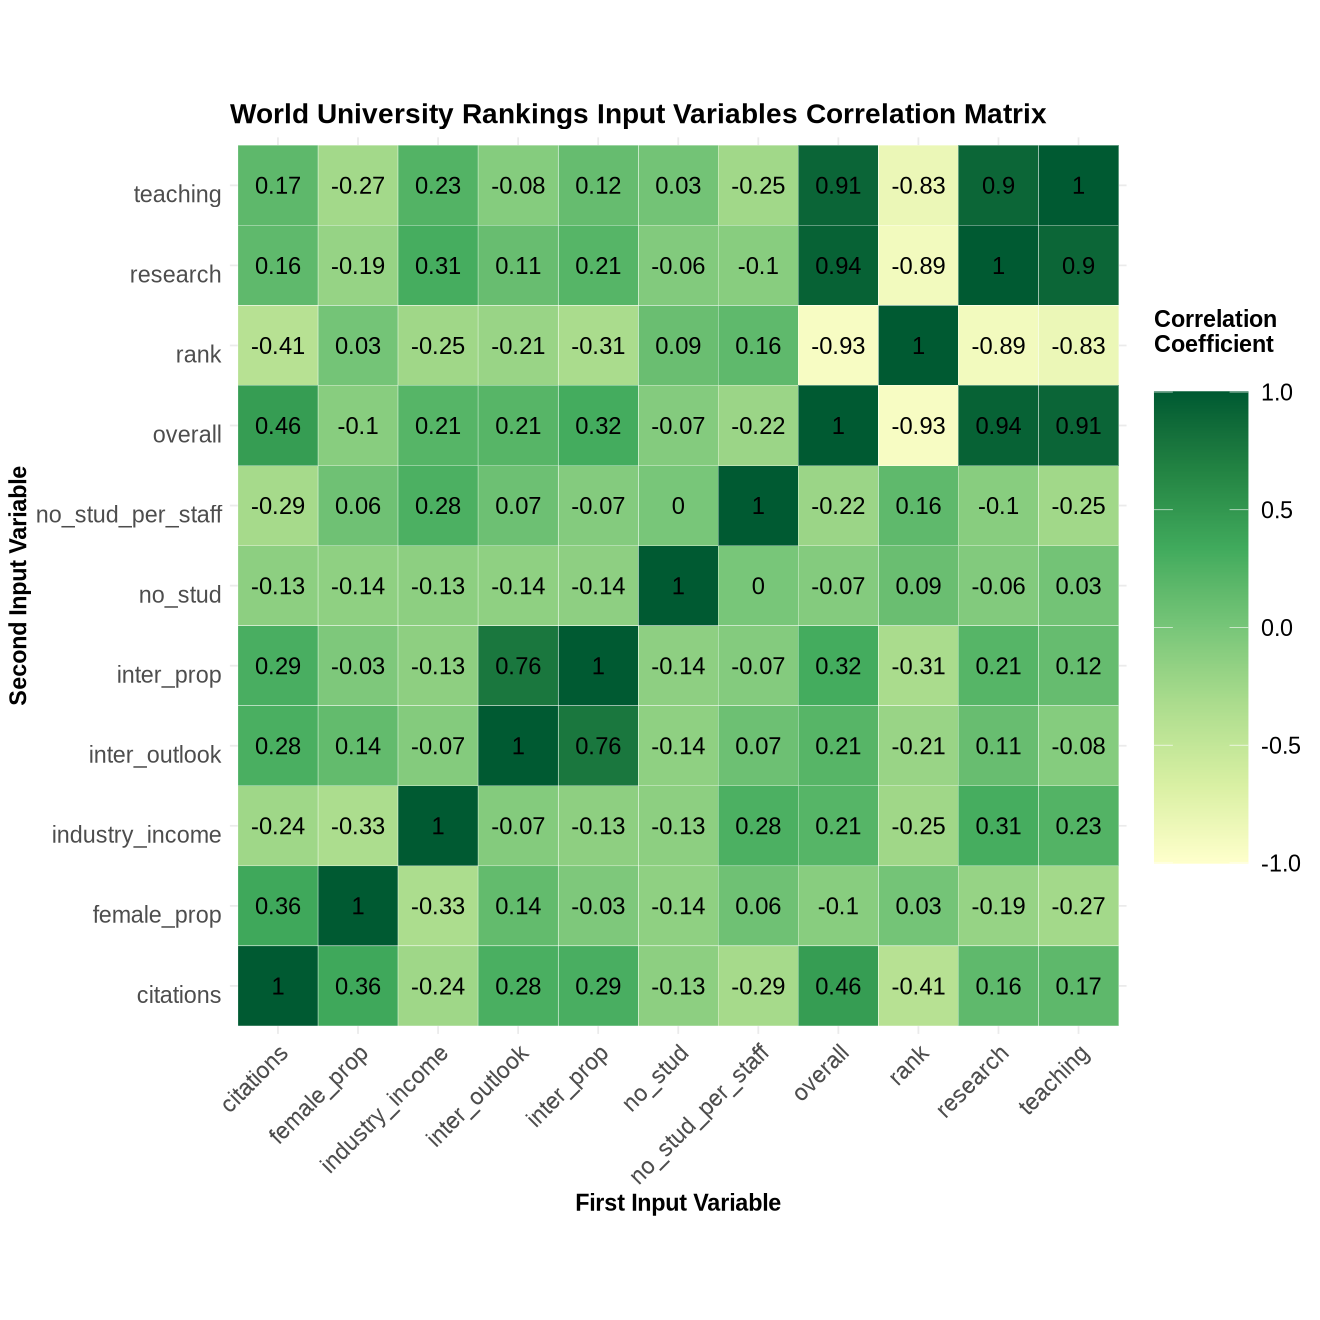

In [6]:
options(repr.plot.width = 11, repr.plot.height = 11)

# plotting data
plot_corr_matrix <- corr_matrix_wur %>%
   ggplot(aes(x = var1, y = var2)) +
   geom_tile(aes(fill = corr), color = "white") +
   scale_fill_distiller("Correlation\nCoefficient \n",
     palette =  "YlGn",
     direction = 1, limits = c(-1, 1)
   ) +
   labs(x = "First Input Variable", y = "Second Input Variable") +
   ggtitle("World University Rankings Input Variables Correlation Matrix") + 
   theme_minimal() +
   theme(
     axis.text.x = element_text(
       angle = 45, vjust = 1,
       size = 14, hjust = 1
     ),
     axis.text.y = element_text(
       vjust = 1,
       size = 14, hjust = 1
     ),
     legend.title = element_text(size = 14, face = "bold"),
     legend.text = element_text(size = 14),
     legend.key.size = unit(2, "cm"),
     text = element_text(size = 14),
     title = element_text(size = 14, face = "bold")  
   ) +
   coord_fixed() +
   geom_text(aes(x = var1, y = var2, label = round(corr, digits = 2)), color = "black", size = 5)
plot_corr_matrix

**Fig. 1.** *A correlation matrix plot describing the correlation coefficients between the many input variables*

As seen in Fig. 1, the fifth column (or fifth row from the bottom) shows the correlation between our response variable `inter_prop` and all of the numerical input variables in the dataset. We can also note that there are high correlations between `overall`, `rank`, `teaching`, and `research`.

## b) Methods: Plan

Since we are using several input variables to predict the value of the response variable, we will create an *additive multiple linear regression (MLR)* model. 

We will use a *forward selection algorithm* to determine the ideal number of variables in our World University Rankings dataset, as well as allow this algorithm to select the best variables to use. This is a stepwise algorithm, which is fundamentally useful in identifying the best estimators/input variables based on its training data. Since we cannot test the model using the data it was trained on, we will split our 173-observation dataset into a *training* and a *testing* set. We cannot use stepwise algorithms when the number of observations is less than the number of variables, but we are only considering 10 variables for our forward selection process and have about 120 observationsin our training set, so this is not an issue. 

While categorical variables can be involved in the algorithm, the computational code does not work very well with them so we will remove the categorical variables beforehand. Another feature of stepwise algorithms is that once a variable is selected, it cannot be removed; this could be an issue if it turns out that the variable was only a good estimator for the first few points of data the algorithm looked at, but this is a risk we are willing to take. A further issue arising from these algorithms is that they are not necessarily easy to understand in terms of statistical theory, especially within the scope of this course, so using such a method is exercising faith that it will work properly and effectively.

After fitting the model, we can test its efficacy by finding an adjusted coefficient of determination $(R^2)$ to find the proportion of variance that the model explains, thereby assessing its fit to the data. Another way we can test the model is by using the root mean squared error (RMSE) of the predictions using the test set and comparing them to the RMSE of a model that features all of the available variables.

In using forward selection, we want the number of variables to have a minimal $C_p$ value. This value is an estimate of the size of the bias that our model will have on the predicted values.

First, we will make a regression model without using forward selection to select variables. We will use this model to see the extent of how multicollinearity may affect our model, as well as compare it to our reduced model to ensure our reduced model is superior.

In [7]:
set.seed(42)

trainf <- sample_n(wur, size = nrow(wur) * 0.70,
         replace = FALSE)

testf <- anti_join(wur,
        trainf,
        by = "name") #ensures universities are unique

trainf <- trainf %>% select(-name, -loc) #removes non-numerical variables
testf <- testf %>% select(-name, -loc)

In [8]:
# training a full regression model
wurnum_full <- lm(inter_prop~., trainf)
summary(wurnum_full)


Call:
lm(formula = inter_prop ~ ., data = trainf)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14140 -0.04385 -0.00850  0.03835  0.25242 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.462e-01  1.789e-01   1.376 0.171550    
rank              -6.739e-04  3.547e-04  -1.900 0.060083 .  
no_stud           -7.152e-07  5.681e-07  -1.259 0.210693    
no_stud_per_staff -8.829e-06  7.297e-04  -0.012 0.990369    
female_prop       -3.717e-01  1.010e-01  -3.681 0.000361 ***
overall           -2.079e-01  2.356e-01  -0.882 0.379535    
teaching           6.289e-02  7.057e-02   0.891 0.374826    
research           6.103e-02  7.084e-02   0.861 0.390883    
citations          6.255e-02  7.084e-02   0.883 0.379178    
industry_income    3.772e-03  5.932e-03   0.636 0.526165    
inter_outlook      2.094e-02  1.764e-02   1.187 0.237795    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.074

In the exploratory data analysis, we made note of multicollinearity between some input variables. Below, we will check if the full regression model shows this by using `vif()` to obtain the variance inflation factors of the inputs.

In [9]:
vif(wurnum_full)

rank           no_stud no_stud_per_staff       female_prop 
     8.508592e+00      1.403030e+00      1.398514e+00      1.546272e+00 
          overall          teaching          research         citations 
     1.485639e+05      2.808978e+04      3.643330e+04      1.069089e+04 
  industry_income     inter_outlook 
     2.753984e+02      1.941202e+03

As seen in the output above, the variance is inflated for several input variables. However, we want our model to have independent input variables, so instead of using all the variables, we will select specific variables to remain in our model. It is also worth noting that only numerical variables will be considered, as the categorical variables in this dataset are inconsistently formatted and many observations are lacking proper labels. Our model will also be simpler to understand using only numerical variables.

From the **Methods: Plan** section, we proposed utilizing forward selection and running multiple linear regression using the selected variables. This will be done below.

In [10]:
#splitting the data into training and testing sets
set.seed(25)

wur_train <- sample_n(wur, size = nrow(wur) * 0.70,
         replace = FALSE)

wur_test <- anti_join(wur,
        wur_train,
        by = "name") #ensures universities are unique

wur_train <- wur_train %>% select(-name, -loc) #removes non-numerical variables
wur_test <- wur_test %>% select(-name, -loc)

In [11]:
#using forward selections to find the ideal number of inputs and which to select
uni_fwd_sel <- regsubsets(
   x=inter_prop~., nvmax = 10,
   data = wur_train,
   method = "forward"
 )

#summarizing results of forward selection
uni_fwd_summary <- summary(uni_fwd_sel)
uni_fwd_summary <- tibble(
    n_input_variables = 1:10,
    RSS = uni_fwd_summary$rss,
    BIC = uni_fwd_summary$bic,
    Cp = uni_fwd_summary$cp
)

In [12]:
uni_fwd_summary

n_input_variables,RSS,BIC,Cp
<int>,<dbl>,<dbl>,<dbl>
1,0.6567621,-104.69133,18.777405
2,0.6052482,-109.77922,10.127535
3,0.5878641,-108.50969,8.533604
4,0.5598200,-109.62846,4.735819
5,0.5439355,-108.31560,3.451906
6,0.5379230,-104.86476,4.208890
7,0.5335343,-101.06020,5.301586
8,0.5326697,-96.46067,7.122831
9,0.5321127,-91.79147,9.007680


**Table 1.** *Results of the forward selection*

In [13]:
summary(uni_fwd_sel)

Subset selection object
Call: regsubsets.formula(x = inter_prop ~ ., nvmax = 10, data = wur_train, 
    method = "forward")
10 Variables  (and intercept)
                  Forced in Forced out
rank                  FALSE      FALSE
no_stud               FALSE      FALSE
no_stud_per_staff     FALSE      FALSE
female_prop           FALSE      FALSE
overall               FALSE      FALSE
teaching              FALSE      FALSE
research              FALSE      FALSE
citations             FALSE      FALSE
industry_income       FALSE      FALSE
inter_outlook         FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          rank no_stud no_stud_per_staff female_prop overall teaching research
1  ( 1 )  " "  " "     " "               " "         " "     " "      " "     
2  ( 1 )  " "  " "     " "               " "         " "     "*"      " "     
3  ( 1 )  " "  " "     " "               " "         " "     "*"      " "     
4  ( 1 )  " "  " "     " "              


From inspecting the summarizing tibble, we can see that the smallest $C_p$ value is consistent with using five variables. Therefore, we will be removing `no_stud`, `no_stud_per_staff`, `overall`, `research`, and `citations` as input variables from our reduced model since they have least relevance according to the forward selection results using our training data.

Next, we will make our model using the selected inputs. Although `rank` was selected, we will also remove this variable because, by the definition of this variable in the dataset, `rank` is not indepedent. The `rank` for every observation in this dataset was determined using the other variables; therefore, as we do not want to be including input variables that may depend on other input variables, we will be omitting `rank` from the model. Furthermore, `rank` was one of the four variables that we noted had very high correlation with other variables in the exploratory data analysis above. Since two of the other noted variables were not selected (`overall` and `research`), we will ignore them as well. `teaching` will be selected in the model since the other potential issues with multicollinearity have been accounted for.

In summary, this model will feature `female_prop`, `teaching`, `industry_income`, and `inter_outlook` to predict `inter_prop`.

In [14]:
#training reduced model using selected input variables from forward selection
cp_min = which.min(uni_fwd_summary$Cp) 
selected_var <- names(coef(uni_fwd_sel, cp_min))[-1] #removes (Intercept) from output

subset <- wur_train %>% select(all_of(selected_var),inter_prop, -rank)

wurnum_model <- lm(inter_prop~., subset)

summary(wurnum_model)


Call:
lm(formula = inter_prop ~ ., data = subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11706 -0.04421 -0.00892  0.04043  0.23426 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.0975642  0.0602644  -1.619  0.10818    
female_prop     -0.1852655  0.0768543  -2.411  0.01750 *  
teaching         0.0013964  0.0004218   3.310  0.00124 ** 
industry_income -0.0008992  0.0003529  -2.548  0.01214 *  
inter_outlook    0.0055725  0.0003735  14.919  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06947 on 116 degrees of freedom
Multiple R-squared:  0.6685,	Adjusted R-squared:  0.6571 
F-statistic: 58.49 on 4 and 116 DF,  p-value: < 2.2e-16


Now we will check if the issue of multicollinearity has been solved by again using `vif()`.

In [15]:
vif(wurnum_model)

female_prop        teaching industry_income   inter_outlook 
       1.219123        1.107759        1.197904        1.064553

This time, all the values are low, and much indicate healthy independence since they are all close to 1. Thus, multicollinearity is not an issue for our model.

Below, we will test the efficacy of our model. First, we will evaluate the $R^2$ value. Then, we will compare the RMSE of our model to the full model. If we compare our reduced model to a full model (i.e. we do not remove any variables via forward selection), we would want our reduced model to be better. We can find the RMSE of both and compare the values, where a lesser value is more desirable.

In [16]:
summary(wurnum_model)$adj.r.squared

[1] 0.6570916

In [17]:
full_predict <- predict(wurnum_full, testf)
fwd_predict <- predict(wurnum_model, wur_test)

In [18]:
#comparing RMSE of reduced and full models
RMSE_models <- tibble(
    Model = c("Full Regression", "Reduced Regression"),
    RMSE = c(rmse(full_predict, testf$inter_prop), rmse(fwd_predict, wur_test$inter_prop)))
RMSE_models

Model,RMSE
<chr>,<dbl>
Full Regression,0.09470590
Reduced Regression,0.09351155


**Table 2.** *The root mean squared error of each model (with and without using forward selection)*

After using forward selection to select our variables, we made a reduced model that had a lower RMSE than the full model with all the available inputs. This indicates that our reduced model has a better out-of-sample perfomance, which is encouraging. From the output using `lm()`, it is clear that our model fit the training set adequately well; the adjusted R-squared value of 0.6571 is indicative of a good fit, while the F-statistic of 58.49 and near-zero p-value of 2.2e-16 show that our model is better than the intercept model that uses no inputs at all. As expected, we managed to accomplish the goal posed by the project's initial question, building a model that can effectively predict the proportion of international students in a university.

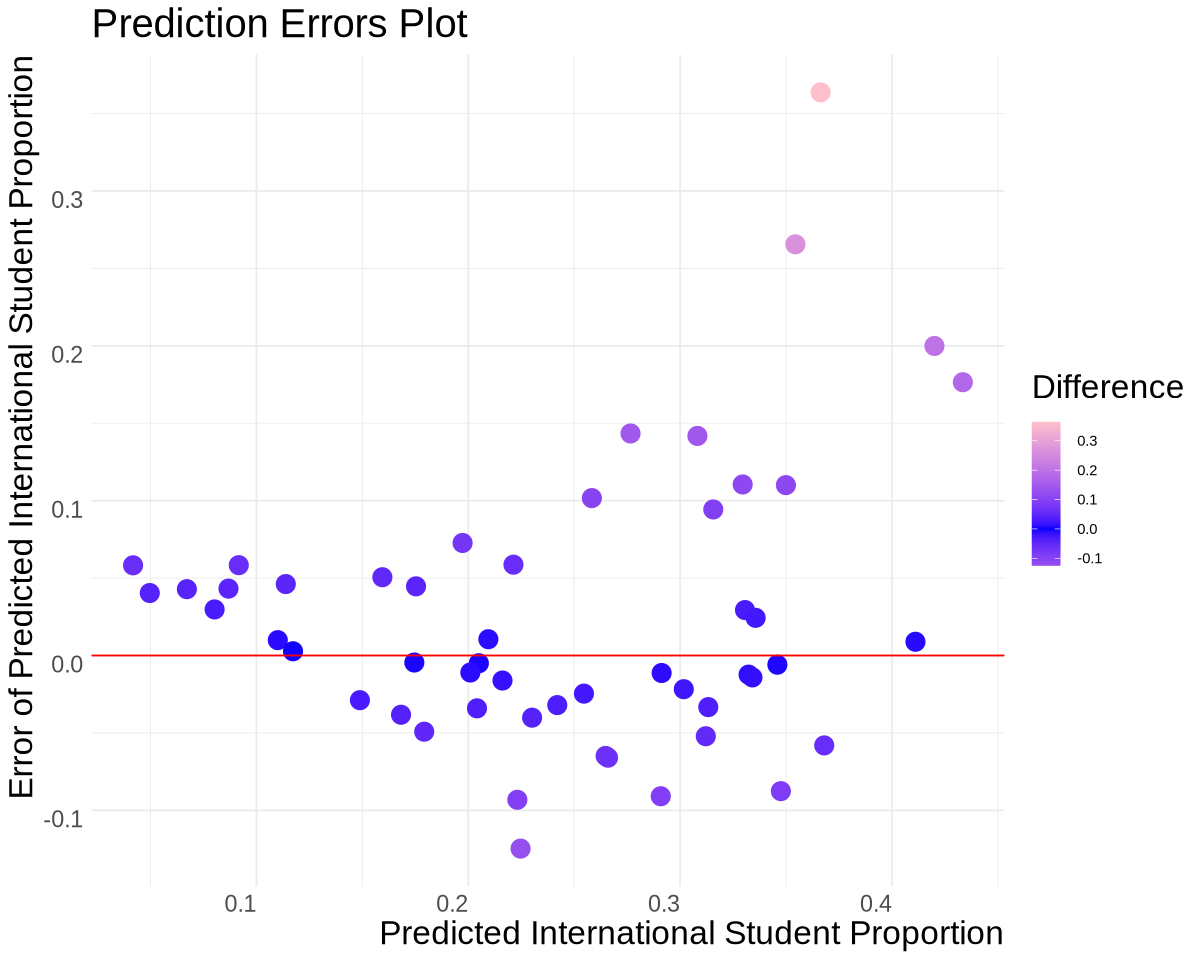

In [21]:
options(repr.plot.width = 10, repr.plot.height = 8)

# plotting an errors plot to observe the nature of the prediction errors produced by our model
comparison <- data.frame(pred = fwd_predict, actual = wur_test$inter_prop)
comparison$diffs <- comparison$actual - comparison$pred

errors_plot <- ggplot(comparison, aes(x = pred, y = diffs, colour = diffs)) +
    geom_point(size = 5) +
    geom_hline(yintercept = 0, color = "red") +
    scale_colour_gradient2(low = "pink", high = "pink", mid = "blue", name = "Difference") + 
    theme_minimal() +
    theme(
     axis.text.x = element_text(
         vjust = 1, size = 14, hjust = 1),
     axis.text.y = element_text(
         vjust = 1, size = 14, hjust = 1),
     title = element_text(
         vjust = 1, size = 20, hjust = 1)) +
    labs(
        title = "Prediction Errors Plot",
        x = "Predicted International Student Proportion",
        y = "Error of Predicted International Student Proportion"
    )
errors_plot

**Fig. 2.** *A scatterplot showing the difference between our model's predicted value compared to the actual value*

# Discussion

## Summary

We used our training set to create a model to address our question. After using forward selection to select our variables, we found the best four variables – Female-to-Male Ratio, Teaching Score, Industry Income Score, and International Outlook Score – to be included in our additive MLR model and help us accurately predict the proportion of international students at a university.
Our reduced model has a lower RMSE of 0.0935 than the full model with all the available inputs, which has an RMSE of 0.0947, corroborating its effective performance. We also got desirable metrics for our adjusted $(R^2)$, F-statistic, and p-value, indicating that our model is a good fit for the training data and has a higher prediction accuracy than the full model.
Thus the reduced model is more appropriate and can effectively answer our proposed question of predicting the proportion of international students in the university using the 4 variables in our chosen model. Our findings indicate how various factors are associated with the international student proportion and how some factors have a higher correlation than others.

Our results are as we expected. The forward selection and correlation coefficient analysis conducted on the training set suggest that our predictive model works best with four input variables. This is reinforced by the low RMSE value we got for our predictions, attesting to the accuracy of the additive model comprised of the four variables in our reduced model.

## Further Discussion

Our model could potentially be improved by making it interactive and account for possible interactions between the terms, which are not captured by the additive model we currently have. Alternatively, we could create a model using LASSO regression, that might have better prediction accuracy than our current model.

Analyzing the factors impacting the proportion of international students in a university may raise further questions on how these factors are assessed in different universities. Additionally, our findings could further lead to future questions/ research about the correlation between distinct factors in a university to the number of domestic and international students studying there.

We wanted to try LASSO or ridge regression but unfortunately did not have enough time to do so. We were also hoping to include Location as one of our predictors, but its multi-level categorical nature would’ve greatly complicated the predictive model and therefore had to be discarded. 

In our analysis, we did not consider the categorical variables in the dataset that might impact our findings. The multiple linear regression used for our analysis, assumes that the relationship between the response and the explanatory variables is linear. If violated, it can produce inaccurate predictions. Furthermore, for forward selection, if a predictor is added to the model later, it will produce the same analysis and can thus produce wrong results. It can also cause overfitting. Additionally, our model is sensitive to outliers, which can influence the results. 

# References

Acar, Tülin. (2022). Indicators Affecting the International Outlook of Universities. SAGE Open. 12. 1-9. 10.1177/21582440221079911.

Lee, Seungcheol & Park, Hee & Kim, Sunny. (2009). Gender differences in international students’ adjustment. College Student Journal. 43. 1217-1227. 

Rahman, Md Sahariar & Rahman, Shahanur & Quainoo, Eric. (2021). A Review of Quality and Quantity of Foreign Students' Education under the Characteristics of the Popularized Times. International Journal of Social Science and Humanity. 9. 155-161. 

Syed Ali Taqi. (2023). World University Rankings 2023 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/6394958
